In [2]:
import pandas as pd

In [4]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# Create a dummy employee dataset
data = {
    'Employee id': [10, 20, 15, 25, 30],
    'Gender': ['M', 'F', 'F', 'M', 'F'],
    'Remarks': ['Good', 'Nice', 'Good', 'Great', 'Nice']
}

In [6]:
# Convert the data into a pandas DataFrame
df = pd.DataFrame(data)
print(f"Original Employee Data:\n{df}\n")
# Use pd.get_dummies() to one-hot encode the categorical columns
df_pandas_encoded = pd.get_dummies(df, columns=['Gender', 'Remarks'], drop_first=True)
print(f"One-Hot Encoded Data using Pandas:\n{df_pandas_encoded}\n")

Original Employee Data:
   Employee id Gender Remarks
0           10      M    Good
1           20      F    Nice
2           15      F    Good
3           25      M   Great
4           30      F    Nice

One-Hot Encoded Data using Pandas:
   Employee id  Gender_M  Remarks_Great  Remarks_Nice
0           10      True          False         False
1           20     False          False          True
2           15     False          False         False
3           25      True           True         False
4           30     False          False          True



In [1]:
import numpy as np

# Define a matrix
A = np.array([[4, 2], [1, 3]])

# Compute eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(A)

print("Eigenvalues:", eigenvalues)
print("Eigenvectors:\n", eigenvectors)


Eigenvalues: [5. 2.]
Eigenvectors:
 [[ 0.89442719 -0.70710678]
 [ 0.4472136   0.70710678]]


In [3]:
import numpy as np
# Define two vectors
u = np.array([2, 3])
v = np.array([1, 1])
# Dot product
dot_product = np.dot(u, v)
print("Dot Product:", dot_product)
# Projection
projection = (np.dot(u, v) / np.dot(v, v)) * v
print("Projection of u on v:", projection)


Dot Product: 5
Projection of u on v: [2.5 2.5]


# PCA



In [14]:
from sklearn.datasets import load_iris
import pandas as pd

# Load the dataset
iris = load_iris()

In [16]:
# Convert to DataFrame for easier manipulation
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [18]:
df['species'] = iris.target  # Add target column (categorical)
df['species_name'] = df['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})  # Add species names
print(df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   species species_name  
0        0       setosa  
1        0       setosa  
2        0       setosa  
3        0       setosa  
4        0       setosa  


Matplotlib is building the font cache; this may take a moment.


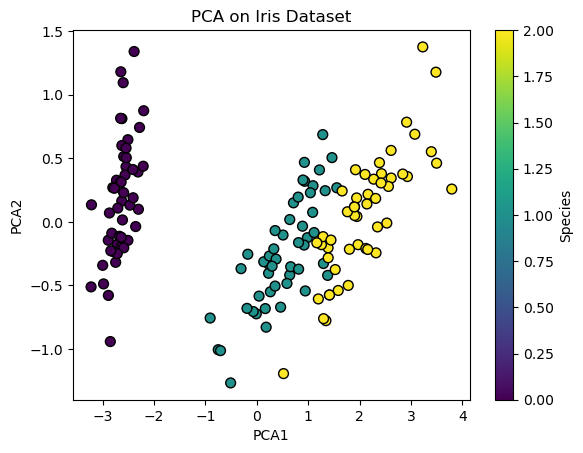

In [20]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Select numerical features
X = df[iris.feature_names]

# Apply PCA
pca = PCA(n_components=2)  # Reduce to 2 components
X_pca = pca.fit_transform(X)

# Add PCA components to the DataFrame for visualization
df['PCA1'] = X_pca[:, 0]
df['PCA2'] = X_pca[:, 1]

# Plot the results
plt.scatter(df['PCA1'], df['PCA2'], c=df['species'], cmap='viridis', edgecolor='k', s=50)
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('PCA on Iris Dataset')
plt.colorbar(label='Species')
plt.show()
